In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [17]:
crim_offence = pd.read_csv("../data/raw/crim_offence.csv")
crim_offence.shape

(317503, 9)

In [16]:
crim_offence.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2020,December,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1
1,2020,December,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B41 Motor vehicle theft,1
2,2020,December,Alpine,3691,Glen Creek,C Drug offences,C30 Drug use and possession,C32 Drug possession,1
3,2020,December,Alpine,3691,Gundowring,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1
4,2020,December,Alpine,3691,Gundowring,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1


In [30]:
# number of postcodes and suburbs
crim_offence.Postcode.nunique(), crim_offence['Suburb/Town Name'].nunique()

(697, 2827)

In [18]:
# Top Offences
crim_offence["Offence Division"].value_counts().sort_values()

F Other offences                          6542
C Drug offences                          22000
E Justice procedures offences            32591
D Public order and security offences     38226
A Crimes against the person              86470
B Property and deception offences       131674
Name: Offence Division, dtype: int64

In [19]:
crim_offence.groupby(["Offence Division"])["Incidents Recorded"].sum().sort_values()

Offence Division
F Other offences                          45141
C Drug offences                          147102
D Public order and security offences     244248
E Justice procedures offences            360358
A Crimes against the person              547379
B Property and deception offences       2337497
Name: Incidents Recorded, dtype: int64

<AxesSubplot:xlabel='Offence Division'>

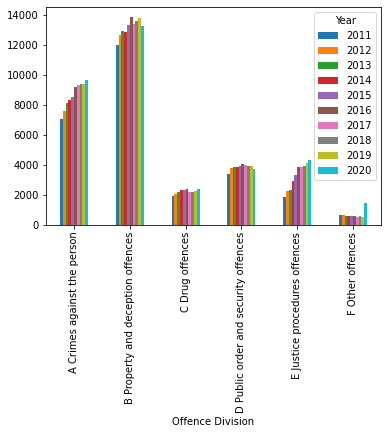

In [20]:
pd.crosstab(crim_offence["Offence Division"],crim_offence["Year"]).plot.bar()

<AxesSubplot:xlabel='Offence Division'>

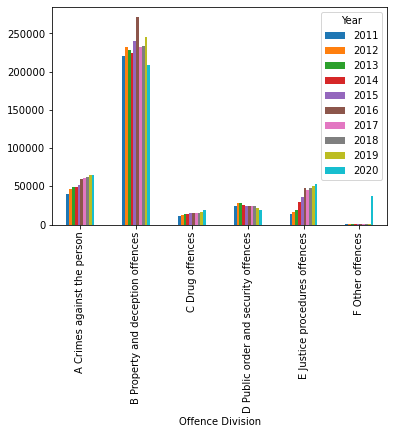

In [21]:
pd.pivot_table(crim_offence, values = 'Incidents Recorded', index = 'Offence Division',
               columns = 'Year',aggfunc ='sum').plot.bar()

In [26]:
# Top 20 LGA
top_lgas = crim_offence.groupby(["Local Government Area"])["Incidents Recorded"].sum()
top_lgas.sort_values(ascending=False).head(20)

Local Government Area
Melbourne               257085
Greater Geelong         154874
Brimbank                147067
Casey                   145986
Hume                    143485
Greater Dandenong       133762
Wyndham                 113106
Darebin                 111467
Whittlesea              109631
Frankston               108464
Moreland                105344
Yarra                   102776
Port Phillip             95016
Latrobe                  88083
Ballarat                 83530
Mornington Peninsula     80182
Melton                   80086
Stonnington              80015
Kingston                 79201
Monash                   78592
Name: Incidents Recorded, dtype: int64

In [27]:
# Top 20 postcodes
top_lgas = crim_offence.groupby(["Postcode"])["Incidents Recorded"].sum()
top_lgas.sort_values(ascending=False).head(20)

Postcode
3000    146050
3175     77110
3199     62333
3030     53190
3350     52703
3020     48793
3977     47426
3029     45918
3072     40185
3630     39679
3064     39132
3500     39120
3021     38841
3550     38562
3182     36751
3121     35559
3047     33212
3073     32532
3023     32505
3214     32353
Name: Incidents Recorded, dtype: int64

### Save number of incidents in each postcode

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2020,December,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1
1,2020,December,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B41 Motor vehicle theft,1
2,2020,December,Alpine,3691,Glen Creek,C Drug offences,C30 Drug use and possession,C32 Drug possession,1
3,2020,December,Alpine,3691,Gundowring,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1
4,2020,December,Alpine,3691,Gundowring,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1


In [33]:
crime_poa = crim_offence.groupby(['Year', 'Local Government Area', 'Postcode'])['Incidents Recorded'].sum()

In [35]:
crime_poa = crime_poa.reset_index(name="Total Incidents")

In [36]:
crime_poa

,Year,Local Government Area,Postcode,Total Incidents
0,2011,Alpine,3691,5
1,2011,Alpine,3697,4
2,2011,Alpine,3698,3
3,2011,Alpine,3699,13
4,2011,Alpine,3737,153
...,...,...,...,...
8996,2020,Yarriambiack,3485,2
8997,2020,Yarriambiack,3487,3
8998,2020,Yarriambiack,3488,3
8999,2020,Yarriambiack,3489,1


In [38]:
crime_poa.to_csv("../data/processed/poa_crime.csv", index=False)